# Exploratory Data Analysis



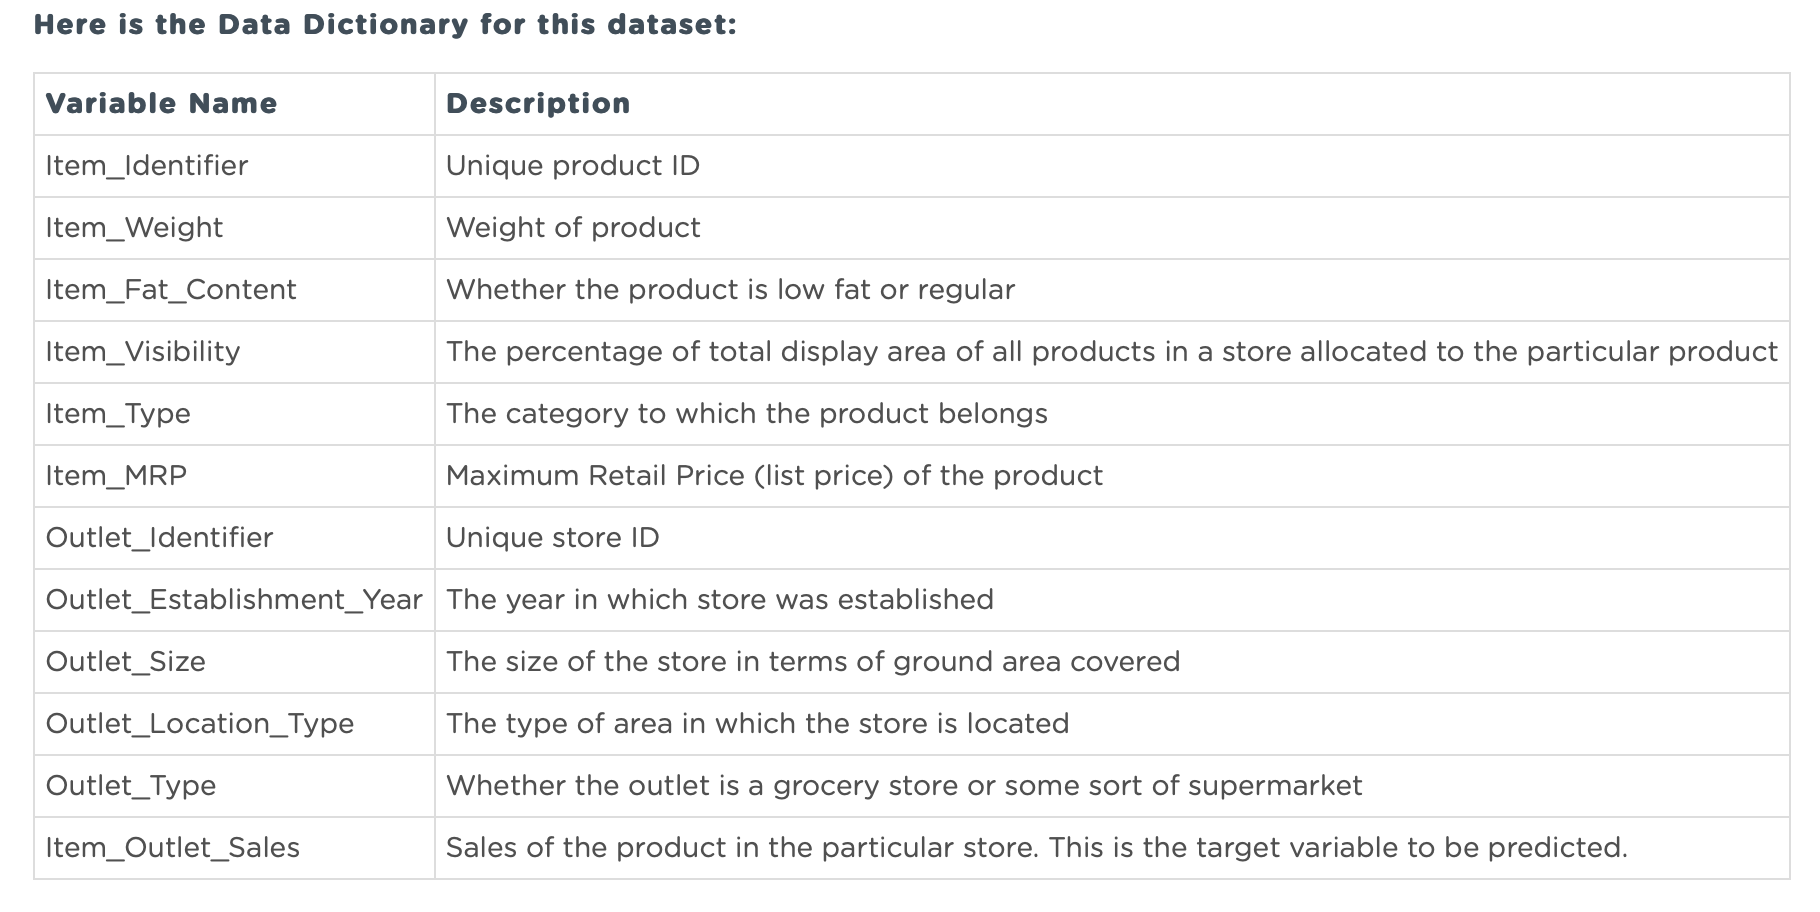

In [343]:
# imports for data only
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/CODING_DOJO/PROJECT/Data/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [344]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [345]:
# view columns with missing values 
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [346]:
# drop all of the outlet size column since that has the most missing data
# item identifier is not used because the item type gives a better categorization.
df.drop(columns = ['Outlet_Size', 'Item_Identifier',], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [347]:
# Drop any other missing data
df = df.dropna(how = 'any')
df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [348]:
# view data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           7060 non-null   object 
 2   Item_Visibility            7060 non-null   float64
 3   Item_Type                  7060 non-null   object 
 4   Item_MRP                   7060 non-null   float64
 5   Outlet_Identifier          7060 non-null   object 
 6   Outlet_Establishment_Year  7060 non-null   int64  
 7   Outlet_Location_Type       7060 non-null   object 
 8   Outlet_Type                7060 non-null   object 
 9   Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 606.7+ KB


In [349]:
# make all low fat and regular items same name
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

## Initial Data Visualization


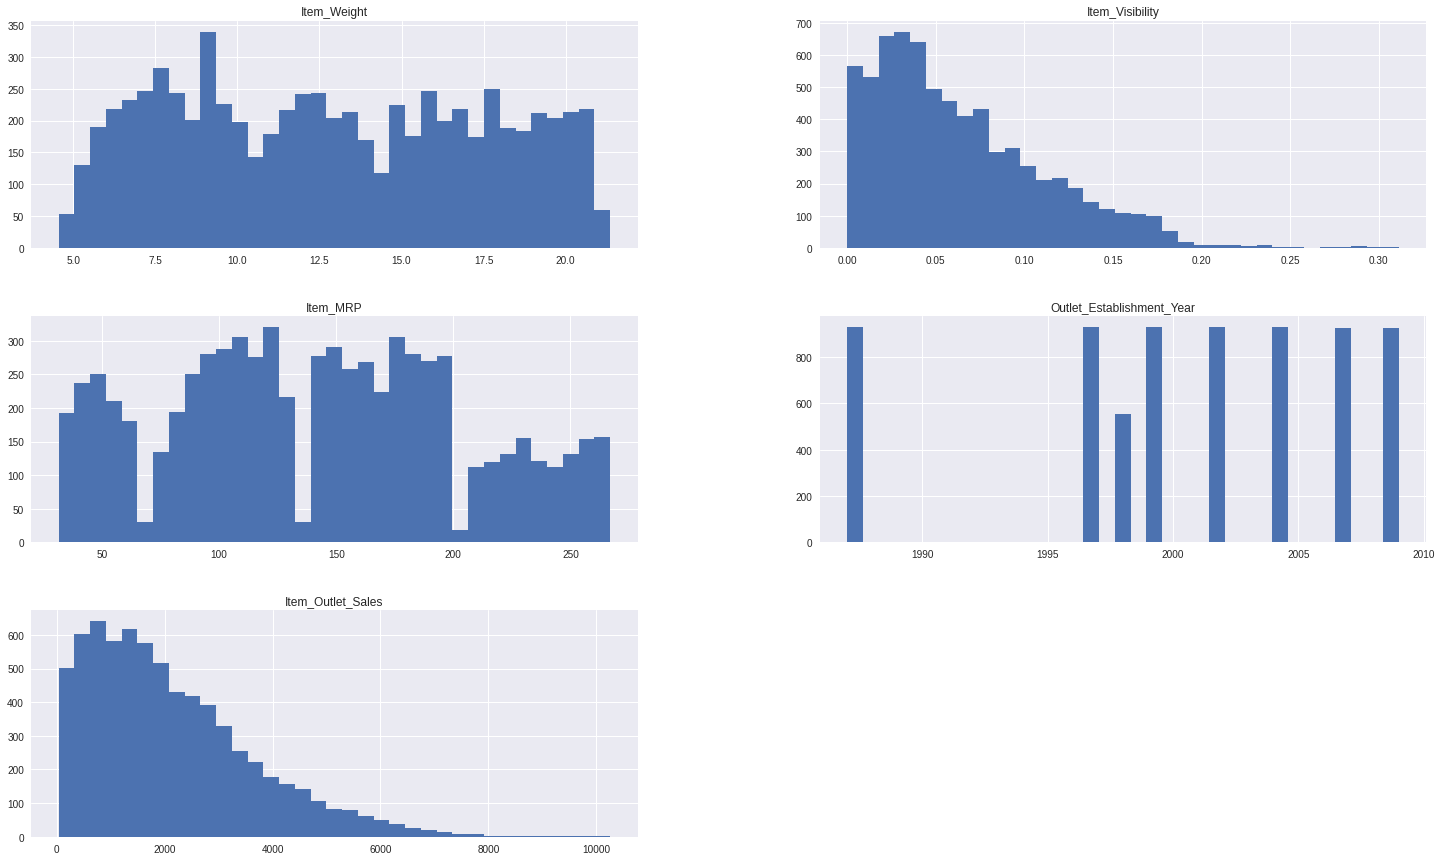

In [350]:
# Visualize the Data
plt.style.use('seaborn')
df.hist(bins=35, figsize=(25,15));

In [351]:
# group sales by outlet establishment year.
_sales = df.groupby(['Outlet_Establishment_Year'])[['Item_Outlet_Sales']].sum().div(1000000)

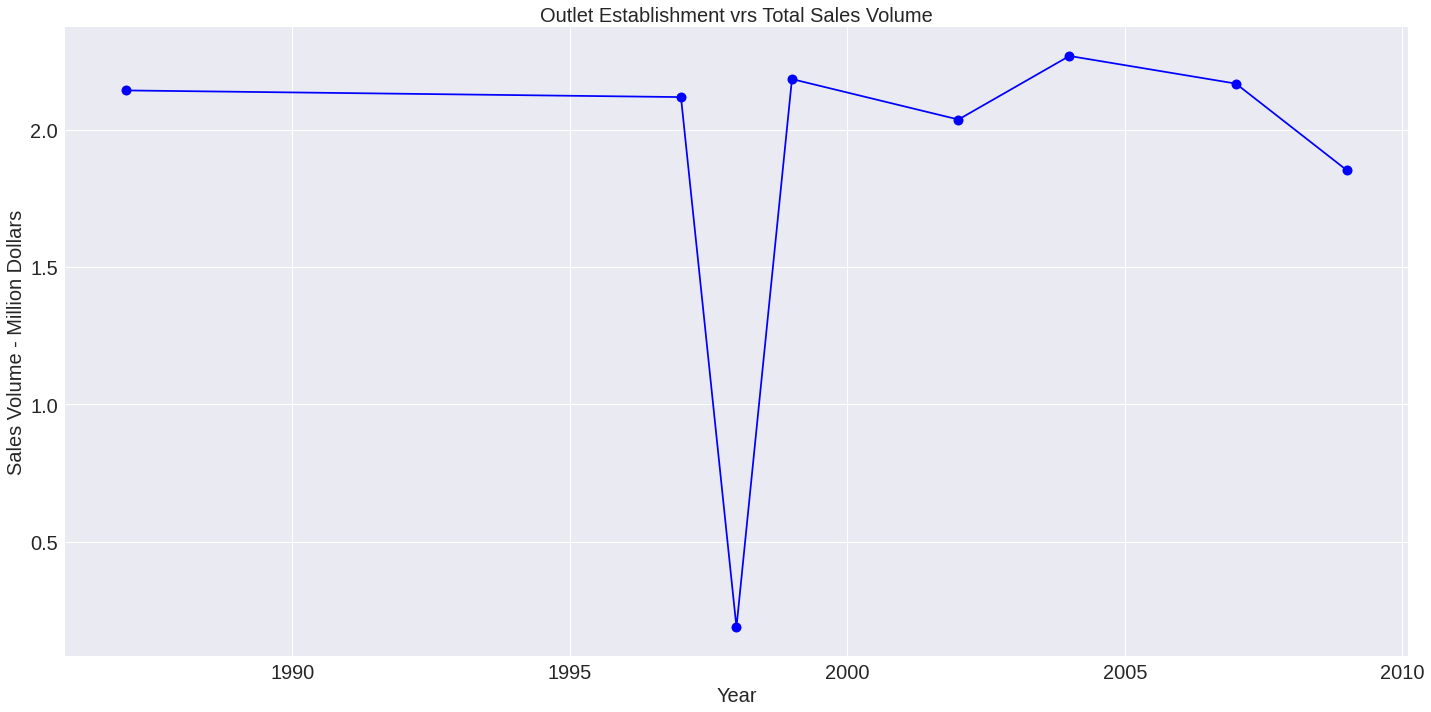

In [352]:
#  Outlet Establishment vrs Total Sales Volume 
plt.figure(figsize = (20, 10))

plt.plot(_sales.index, _sales.values, c = 'b', marker = 'o', markersize = 10);
plt.title('Outlet Establishment vrs Total Sales Volume', fontsize = 20)
plt.ylabel('Sales Volume - Million Dollars', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales.png', dpi = 300);

In [353]:
# filter out all low fat items
_lowfat = df.loc[(df['Item_Fat_Content'] == 'Low Fat')]
_lowfat.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
10,11.80,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Tier 1,Supermarket Type1,1516.0266
14,16.35,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,Tier 3,Supermarket Type1,1977.4260


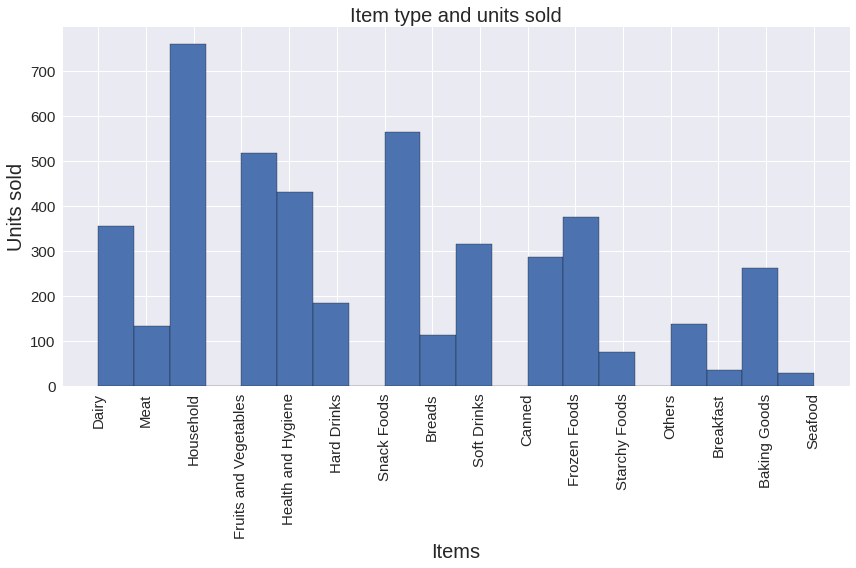

In [354]:
# histogram of volume of all items sold
plt.style.use('seaborn')
plt.figure(figsize = (12,8))
_lowfat['Item_Type'].hist(bins = 20, edgecolor = 'black')
plt.title('Item type and units sold', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Items', fontsize = 20)
plt.ylabel('Units sold', fontsize = 20)
plt.tight_layout();
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales1.png', dpi = 300);

In [355]:
# filter out all regular items
_regular = df.loc[(df['Item_Fat_Content'] == 'Regular')]
_regular.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
5,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Tier 3,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,Tier 3,Supermarket Type1,343.5528
8,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Tier 2,Supermarket Type1,1076.5986


In [356]:
# filter out all low fat dairy items
_lowfatdairy = _lowfat.loc[_lowfat['Item_Type'] == 'Dairy']
_lowfatdairy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
19,13.35,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Tier 2,Supermarket Type1,2748.4224
30,19.25,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Tier 3,Grocery Store,163.7868
40,13.35,Low Fat,0.102512,Dairy,230.6352,OUT046,1997,Tier 1,Supermarket Type1,3435.5280
45,6.42,Low Fat,0.089499,Dairy,178.1002,OUT010,1998,Tier 3,Grocery Store,358.2004


In [357]:
# filter out all regular dairy items
_regfatdairy = _regular.loc[_regular['Item_Type'] == 'Dairy']
_regfatdairy.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
11,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Tier 1,Supermarket Type1,2187.1530
28,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Tier 3,Grocery Store,178.4344
67,13.650,Regular,0.078946,Dairy,186.0240,OUT045,2002,Tier 2,Supermarket Type1,1118.5440
183,5.750,Regular,0.075108,Dairy,112.8176,OUT013,1987,Tier 3,Supermarket Type1,1374.2112
263,13.600,Regular,0.119418,Dairy,231.0300,OUT045,2002,Tier 2,Supermarket Type1,5359.6900


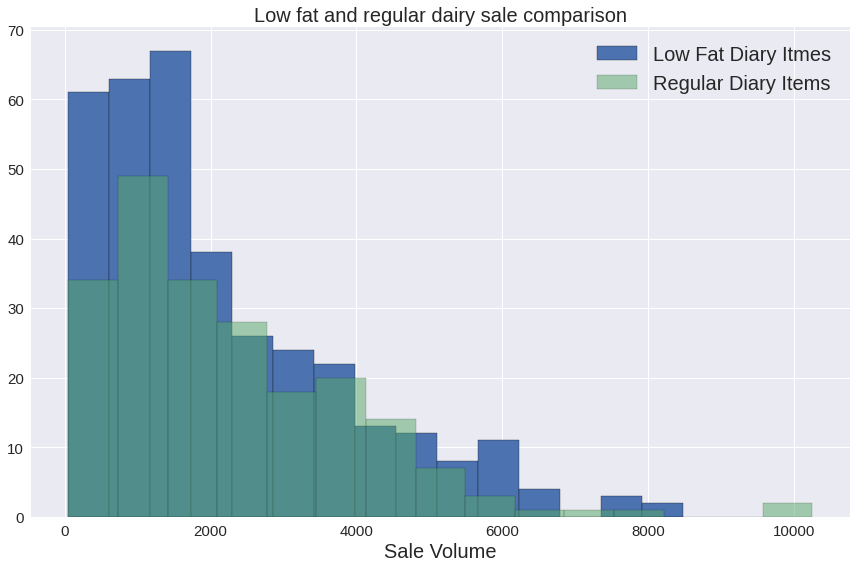

In [358]:
# histogram of Low Fat Vrs Regular Diary items
plt.style.use('seaborn')
plt.figure(figsize = (12,8))
_lowfatdairy['Item_Outlet_Sales'].hist(bins = 15, edgecolor = 'black', label = 'Low Fat Diary Itmes');
_regfatdairy['Item_Outlet_Sales'].hist(bins = 15, edgecolor = 'black', alpha = 0.5, label = 'Regular Diary Items');
plt.title('Low fat and regular dairy sale comparison', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sale Volume', fontsize = 20)
# plt.ylabel('Count', fontsize = 20)
plt.legend(fontsize = 20);
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales2.png', dpi = 300);

# Format Data Types for ML

*Ordinal data*: Outlet_Size, Outlet_Location_Type, Outlet_Type

*Nominal Data*: Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier


In [359]:
# view data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           7060 non-null   object 
 2   Item_Visibility            7060 non-null   float64
 3   Item_Type                  7060 non-null   object 
 4   Item_MRP                   7060 non-null   float64
 5   Outlet_Identifier          7060 non-null   object 
 6   Outlet_Establishment_Year  7060 non-null   int64  
 7   Outlet_Location_Type       7060 non-null   object 
 8   Outlet_Type                7060 non-null   object 
 9   Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 606.7+ KB


In [360]:
# View data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           7060 non-null   object 
 2   Item_Visibility            7060 non-null   float64
 3   Item_Type                  7060 non-null   object 
 4   Item_MRP                   7060 non-null   float64
 5   Outlet_Identifier          7060 non-null   object 
 6   Outlet_Establishment_Year  7060 non-null   int64  
 7   Outlet_Location_Type       7060 non-null   object 
 8   Outlet_Type                7060 non-null   object 
 9   Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 606.7+ KB


In [361]:
# ohe hot encode nominal data types using pandas get dummies
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Type','Outlet_Location_Type' ], drop_first=True)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,0.016047,249.8092,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,5.92,0.019278,48.2692,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
2,17.50,0.016760,141.6180,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,19.20,0.000000,182.0950,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,8.93,0.000000,53.8614,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


# Visualize data after formatting


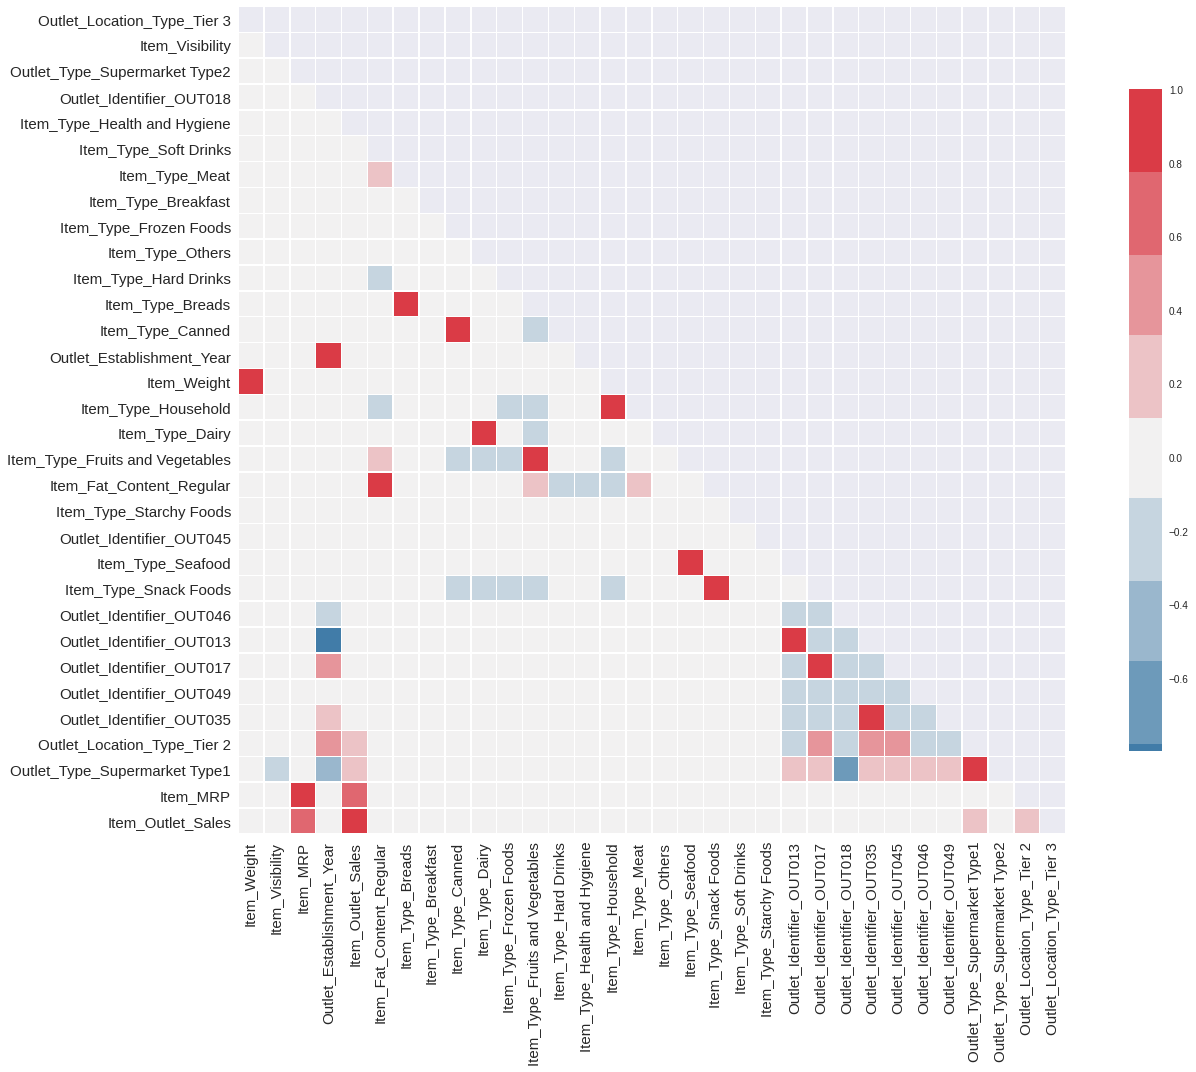

In [362]:
# visualize corrrelations -  Part of the code from https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap
plt.figure(figsize = (20,15))
mask = np.zeros_like(df.loc[:,:].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.loc[:,:].corr().sort_values(by = 'Item_Outlet_Sales'), 
            cmap = sns.diverging_palette(240, 10, n=9), 
            vmax=1.0, 
            center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={'shrink':0.8},
            mask=mask);# .sort_values(by = 'Item_Outlet_Sales')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales3.png', dpi = 300);

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      7060 non-null   float64
 1   Item_Visibility                  7060 non-null   float64
 2   Item_MRP                         7060 non-null   float64
 3   Outlet_Establishment_Year        7060 non-null   int64  
 4   Item_Outlet_Sales                7060 non-null   float64
 5   Item_Fat_Content_Regular         7060 non-null   uint8  
 6   Item_Type_Breads                 7060 non-null   uint8  
 7   Item_Type_Breakfast              7060 non-null   uint8  
 8   Item_Type_Canned                 7060 non-null   uint8  
 9   Item_Type_Dairy                  7060 non-null   uint8  
 10  Item_Type_Frozen Foods           7060 non-null   uint8  
 11  Item_Type_Fruits and Vegetables  7060 non-null   uint8  
 12  Item_Type_Hard Drink

# Regression Model using Linear Regression

In [365]:
# Imports for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

In [366]:
# iterating to get the column names
_cols = []
for col in df.columns:
  _cols.append(col)
_cols.remove('Item_Outlet_Sales')
_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Regular',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods',
 'Item_Type_Fruits and Vegetables',
 'Item_Type_Hard Drinks',
 'Item_Type_Health and Hygiene',
 'Item_Type_Household',
 'Item_Type_Meat',
 'Item_Type_Others',
 'Item_Type_Seafood',
 'Item_Type_Snack Foods',
 'Item_Type_Soft Drinks',
 'Item_Type_Starchy Foods',
 'Outlet_Identifier_OUT013',
 'Outlet_Identifier_OUT017',
 'Outlet_Identifier_OUT018',
 'Outlet_Identifier_OUT035',
 'Outlet_Identifier_OUT045',
 'Outlet_Identifier_OUT046',
 'Outlet_Identifier_OUT049',
 'Outlet_Type_Supermarket Type1',
 'Outlet_Type_Supermarket Type2',
 'Outlet_Location_Type_Tier 2',
 'Outlet_Location_Type_Tier 3']

In [367]:
# arrange data into features matrix and target vector - (http://learn.codingdojo.com/m/213/7153/52281)
# features matrix
X = df.loc[:, _cols]
X.shape

(7060, 31)

In [368]:
# target vector
y = df.loc[:, 'Item_Outlet_Sales'].values
y.shape

(7060,)

In [369]:
# Split data into test and taining subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 3)

In [371]:
# create an instance of SKLearn regressor
_reg = LinearRegression(fit_intercept=True)
_reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [373]:
# train model based on data
_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [374]:
# predictions for first 20 values
_reg.predict(X_train[0:20])

array([ 379.22358962,  850.93203594,  449.73312245,  787.03057269,
       2353.15714484,  550.24261135,  581.40106437, 2913.04325592,
       3055.98933106,  751.23196224, 2695.67386708, 1082.6527601 ,
       1547.87426502,  779.55361503, 1827.7800655 , 3994.45263014,
       1622.92113402,  623.59814718,  687.33133824, 1915.84846006])

In [375]:
# R^2 Score 
score = _reg.score(X_test,y_test)
score

0.5069398716904672

In [376]:
# coeffiecient / Slope
sl = _reg.coef_
sl

array([  -1.38216136, -505.91329969,   15.39515717,   13.75018928,
         23.13114628,   19.66524824,  -24.47128587,   36.05011251,
        -57.74231925,  -30.54563498,  -20.78179023,   40.70270042,
         21.40605478,  -22.06264846,   -2.0526894 ,   -6.6742257 ,
        322.47686826,  -11.96036387,   16.71290206,   13.45123865,
        820.01164493,   34.42419469,  738.77155283,  138.56750317,
        -73.86539379,  151.74780003,  213.37780641, 1284.26355543,
        738.77155283,   99.12630406, -464.2519105 ])

In [377]:
# y intercept
yint = _reg.intercept_
yint

-28768.25928606459

# Regression Model using Random Forests

In [378]:
# create an instance of random forest object with tuning parameters
_randreg = RandomForestRegressor(n_estimators = 100)
_randreg

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [379]:
# fit the TRAINING data to the model
_randreg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [380]:
# predict values with test data
_randreg.predict(X_test[0:10])

array([ 662.983666,  961.242092, 3164.833694,  922.792142, 2122.750166,
        802.48874 , 2372.232084, 2578.503582, 1495.832886, 2581.619526])

In [381]:
# score the model
_randreg.score(X_test,y_test)

0.46922158279797554

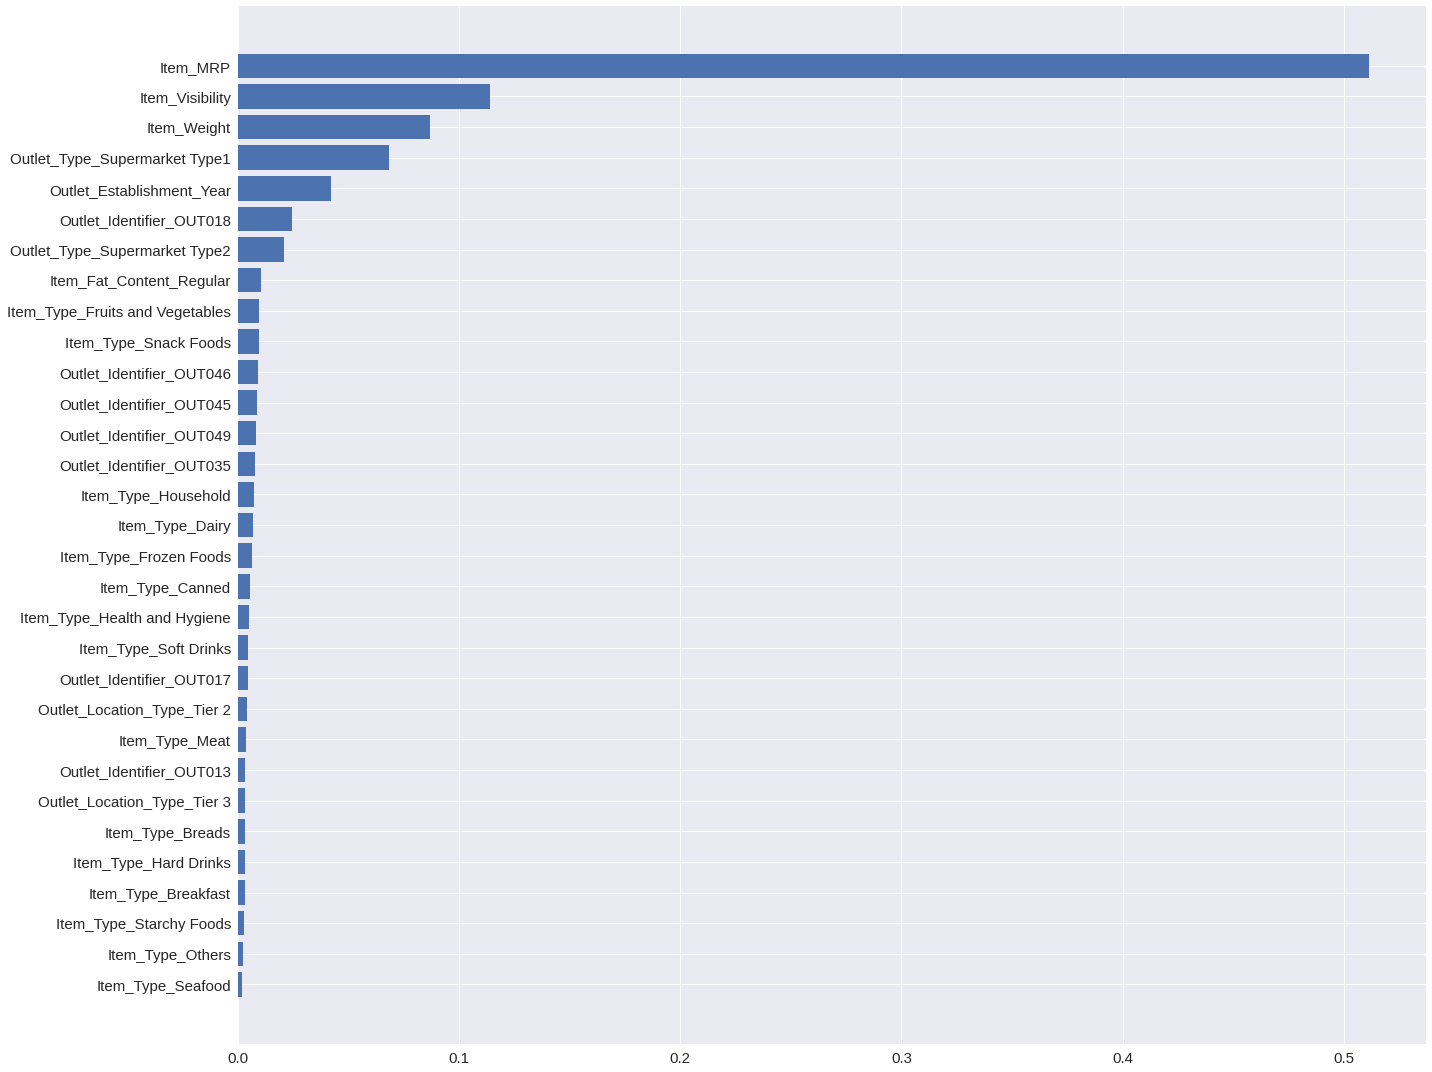

In [386]:
# Get random forest feature importances & plot top

# save feature importance & feature names as df so I can sort them
_randreg_features = pd.DataFrame({'feature': X_train.columns, 'feature_importance': _randreg.feature_importances_})
_randreg_features.sort_values(by = 'feature_importance', inplace = True)

plt.figure(figsize = (20, 15))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.barh(_randreg_features['feature'], _randreg_features['feature_importance']);
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales5.png', dpi = 300);

# Tuning n_estimators (# of decision trees)

In [383]:
estimator_rang = [1]+list(range(10,210,10))
estimator_rang

[1,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200]

In [384]:
scores = []
for i in estimator_rang:
  _randreg = RandomForestRegressor(n_estimators=i,random_state=1,bootstrap=True)
  _randreg.fit(X_train, y_train)
  scores.append(_randreg.score(X_test, y_test))

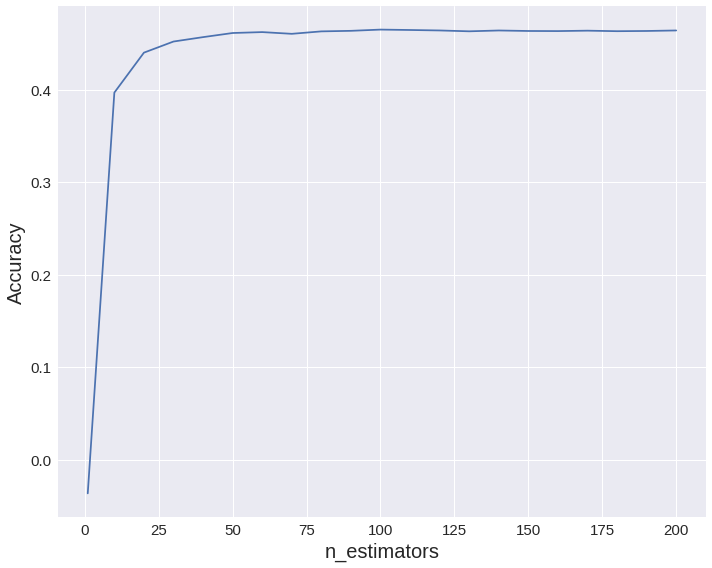

In [387]:
plt.figure(figsize = (10,8))
plt.plot(estimator_rang, scores)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('n_estimators', fontsize =20)
plt.ylabel('Accuracy', fontsize = 20);
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/CODING_DOJO/PROJECT/Sales_Predictions_Project/sales6.png', dpi = 300);